In [29]:
# import math
import math
# import pandas with alias pd
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Let's start by calculating how head changes per day

From this, we calculate recharge, in ft/day. This is a duplication of work from Lecture Notes for Week 4

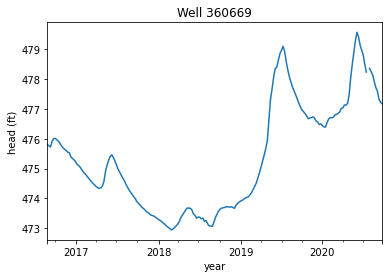

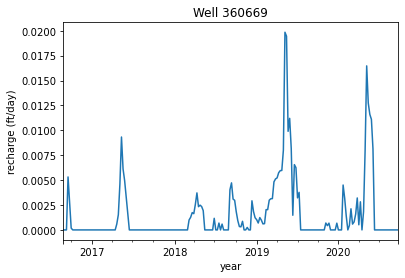

In [31]:
# import and trim data to include only transducers
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead = wellhead[wellhead['method']=='Transducer']

# resample over different time intervals
wellhead_w = wellhead.resample('W').mean()

# plot the heads
wellhead_w.GWE.plot()
plt.title('Well 360669')
plt.ylabel('head (ft)')
plt.xlabel('year')
plt.show()

# plot recharge (ft/d)
wellhead_w['deltah'] = wellhead_w['GWE']-wellhead_w['GWE'].shift()
wellhead_w = wellhead_w.fillna(method='bfill')
# calculate recharge with storage = 0.2 and convert from week to day
wellhead_w['recharge'] = 0.2*wellhead_w['deltah']/7 #ft/day
wellhead_w[wellhead_w['recharge']<0]=0
wellhead_w['recharge'].plot()
plt.title('Well 360669')
plt.ylabel('recharge (ft/day)')
plt.xlabel('year')
plt.show()

# What if we resample per day?

Now let's change the resampling to daily and update the rest of the code accordingly. 

Notice that we get a much more detailed depiction of head change. Unfortunatley, a lot of this is noise (driven by things like changes in atmospheric pressure). If you use daily or more refined in your homework, that is okay, but you may not mimic the recharge plot I presented in your Homework 4. That is okay! Just consider this in your explanation of your Homework 4 results.

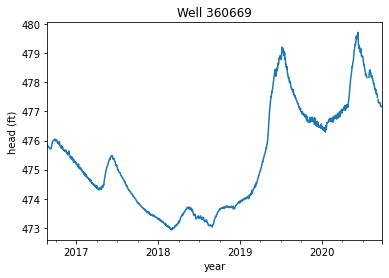

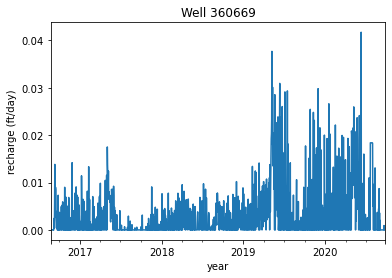

In [46]:
# import and trim data to include only transducers
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead = wellhead[wellhead['method']=='Transducer']

# resample over different time intervals
wellhead_w = wellhead.resample('D').mean()

# plot the heads
wellhead_w.GWE.plot()
plt.title('Well 360669')
plt.ylabel('head (ft)')
plt.xlabel('year')
plt.show()

# plot recharge (ft/d)
wellhead_w['deltah'] = wellhead_w['GWE']-wellhead_w['GWE'].shift()
wellhead_w = wellhead_w.fillna(method='bfill')
# calculate recharge with storage = 0.2 
wellhead_w['recharge'] = 0.2*wellhead_w['deltah'] #ft/day
wellhead_w[wellhead_w['recharge']<0]=0
wellhead_w['recharge'].plot()
plt.title('Well 360669')
plt.ylabel('recharge (ft/day)')
plt.xlabel('year')
plt.show()

# Let's calculate recharge totaled over a year.

There are multiple ways to do this. First, let's do that using resampling after we have calculated all of our recharge values, and then conduct some unit conversions. Review the code and see if  you can follow along with the changes made. 

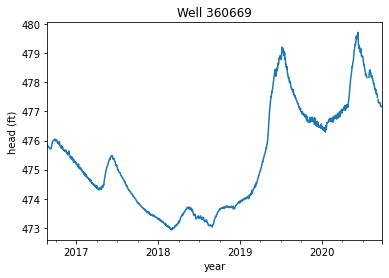

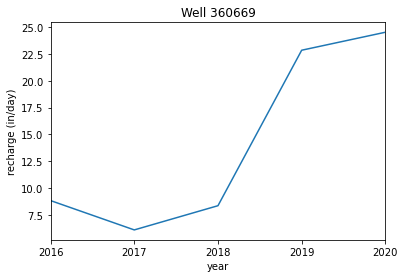

In [48]:
# import and trim data to include only transducers
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead = wellhead[wellhead['method']=='Transducer']

# resample over different time intervals
wellhead_w = wellhead.resample('D').mean()

# plot the heads
wellhead_w.GWE.plot()
plt.title('Well 360669')
plt.ylabel('head (ft)')
plt.xlabel('year')
plt.show()

# plot recharge (ft/d)
wellhead_w['deltah'] = wellhead_w['GWE']-wellhead_w['GWE'].shift()
wellhead_w = wellhead_w.fillna(method='bfill')
# calculate recharge with storage = 0.2 and convert from week to day
wellhead_w['recharge'] = 0.2*wellhead_w['deltah']
wellhead_w[wellhead_w['recharge']<0]=0
# calculate annual total recharge using the mean
wellhead_wm = wellhead_w.resample('Y').mean()*365.25*12 #in/yr
wellhead_wm['recharge'].plot()
plt.title('Well 360669')
plt.ylabel('recharge (in/day)')
plt.xlabel('year')
plt.show()

# Let's calculate recharge totaled over a year.

You can also take a sum when resampling instead of the mean, so no unit conversion of time is required (in the following example, you sum up days into years using resample('Y').sum. 

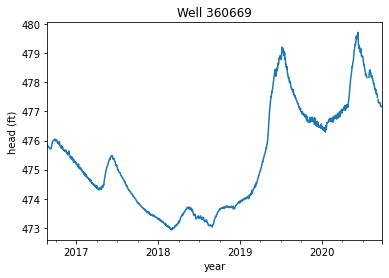

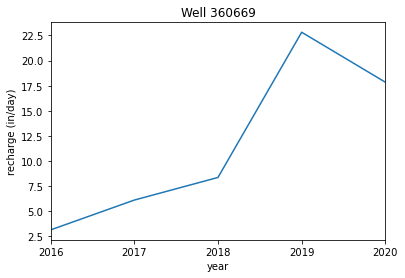

In [51]:
# import and trim data to include only transducers
wellhead = pd.read_csv('http://aqueduct.isws.illinois.edu/data/360669.csv')
wellhead.index = pd.to_datetime(wellhead['TIMESTAMP'])
wellhead = wellhead[wellhead['method']=='Transducer']

# resample over different time intervals
wellhead_w = wellhead.resample('D').mean()

# plot the heads
wellhead_w.GWE.plot()
plt.title('Well 360669')
plt.ylabel('head (ft)')
plt.xlabel('year')
plt.show()

# plot recharge (ft/d)
wellhead_w['deltah'] = wellhead_w['GWE']-wellhead_w['GWE'].shift()
wellhead_w = wellhead_w.fillna(method='bfill')
# calculate recharge with storage = 0.2 and convert from week to day
wellhead_w['recharge'] = 0.2*wellhead_w['deltah']
wellhead_w[wellhead_w['recharge']<0]=0
# calculate annual total recharge using the sum
wellhead_ws = wellhead_w.resample('Y').sum()*12 #in/yr
wellhead_ws['recharge'].plot()
plt.title('Well 360669')
plt.ylabel('recharge (in/day)')
plt.xlabel('year')
plt.show()

# Wait, those are different!!!!!!!

The differences come in the end-members of the data (summing a partial year of data leads to lower values than taking the average for the period of data recorded and multiplying that out).

Which is correct? neither, really. We should only be working with complete years of data. However, the mean approach attempts to extrapolate the subset of data over the full year (this can be very misleading if the subset is for a rainy spring and is extrapolated over a dry summer, fall, and winter). 

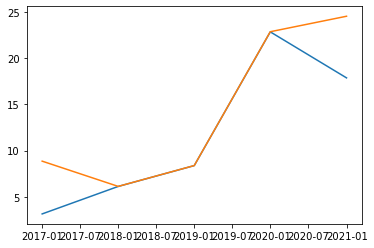

In [52]:
plt.plot(wellhead_ws.index,wellhead_ws.recharge,wellhead_wm.index,wellhead_wm.recharge)